# Assignment 13 : Decison Tree

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


##  Importing Data

In [2]:
df=pd.read_csv('heart_d.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


## EDA

In [3]:
# Perform exploratory data analysis to understand the structure of the dataset.

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [4]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
# Checking for missing values,

df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# checking for the Outliers

def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df   

In [12]:
outlier_Detection(df,['age','trestbps','chol','thalch','oldpeak'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,FALSE,0.0,flat,normal,4
902,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,reversable defect,4
903,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,FALSE,1.5,upsloping,fixed defect,4
904,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,normal,4


# Visualisation

<Figure size 5000x2500 with 0 Axes>

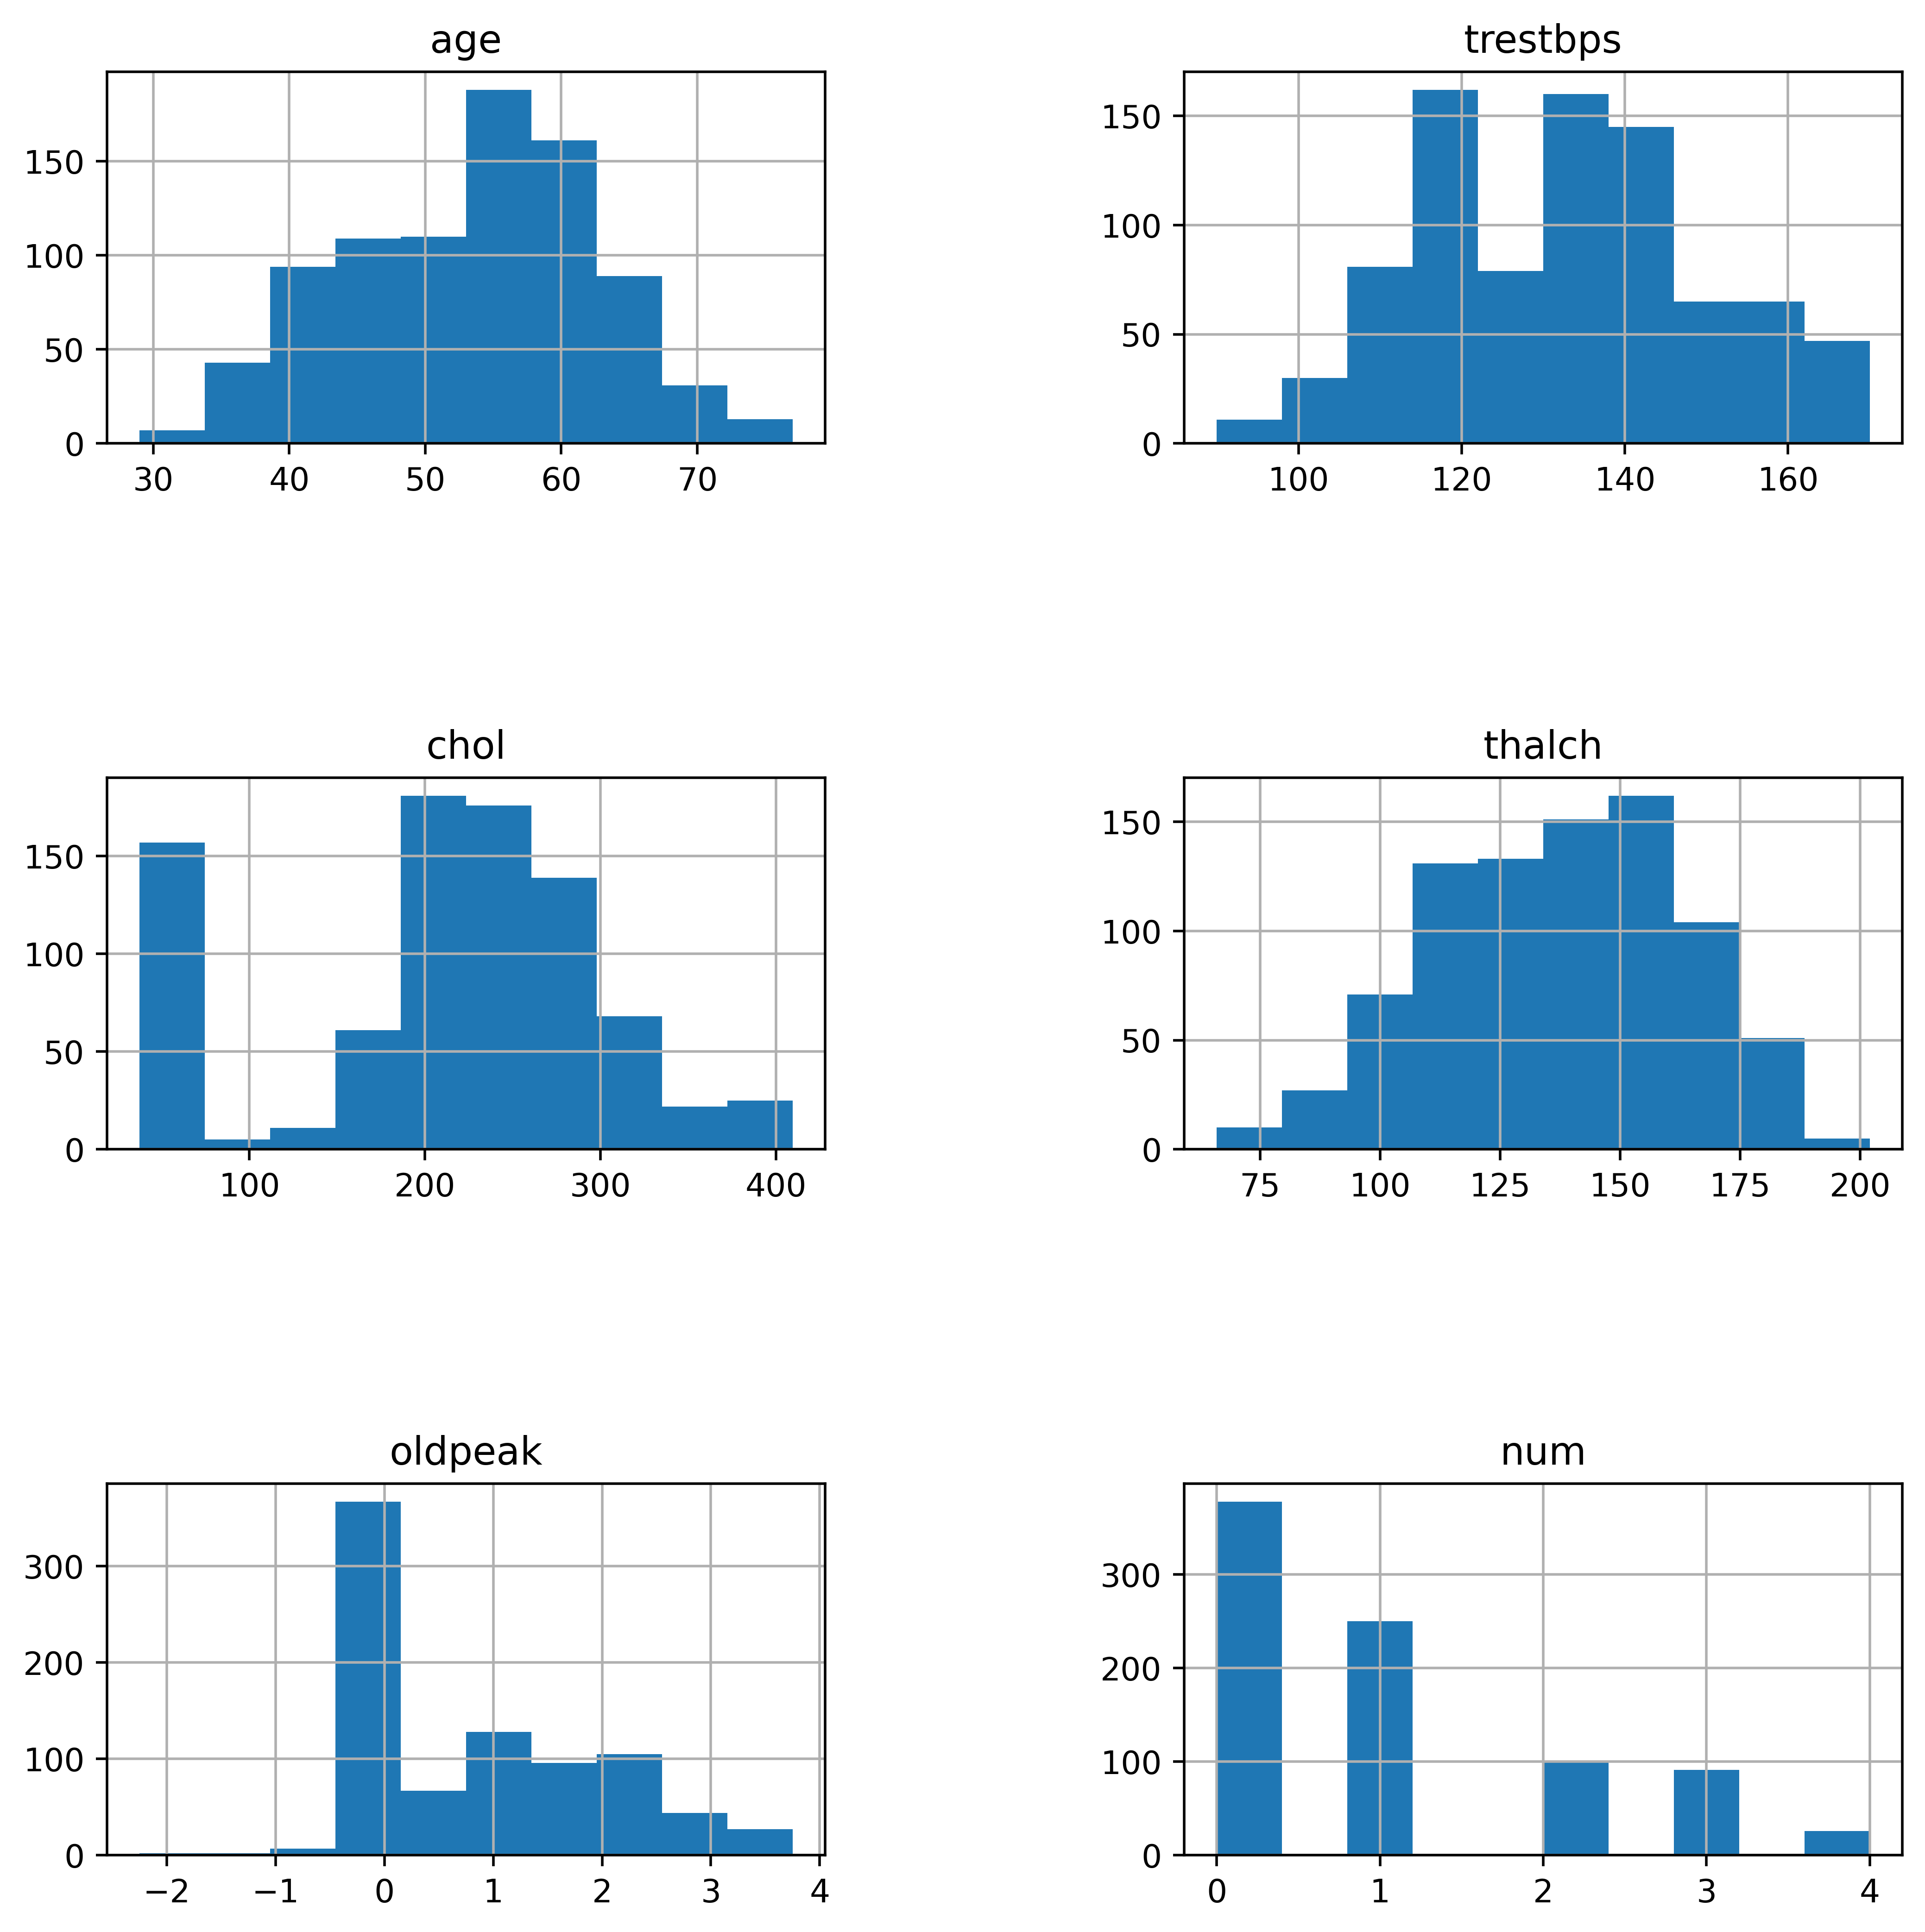

In [13]:
# Histogram

plt.figure(figsize=(10,5))
plt.tight_layout()
df.hist()
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

<Axes: >

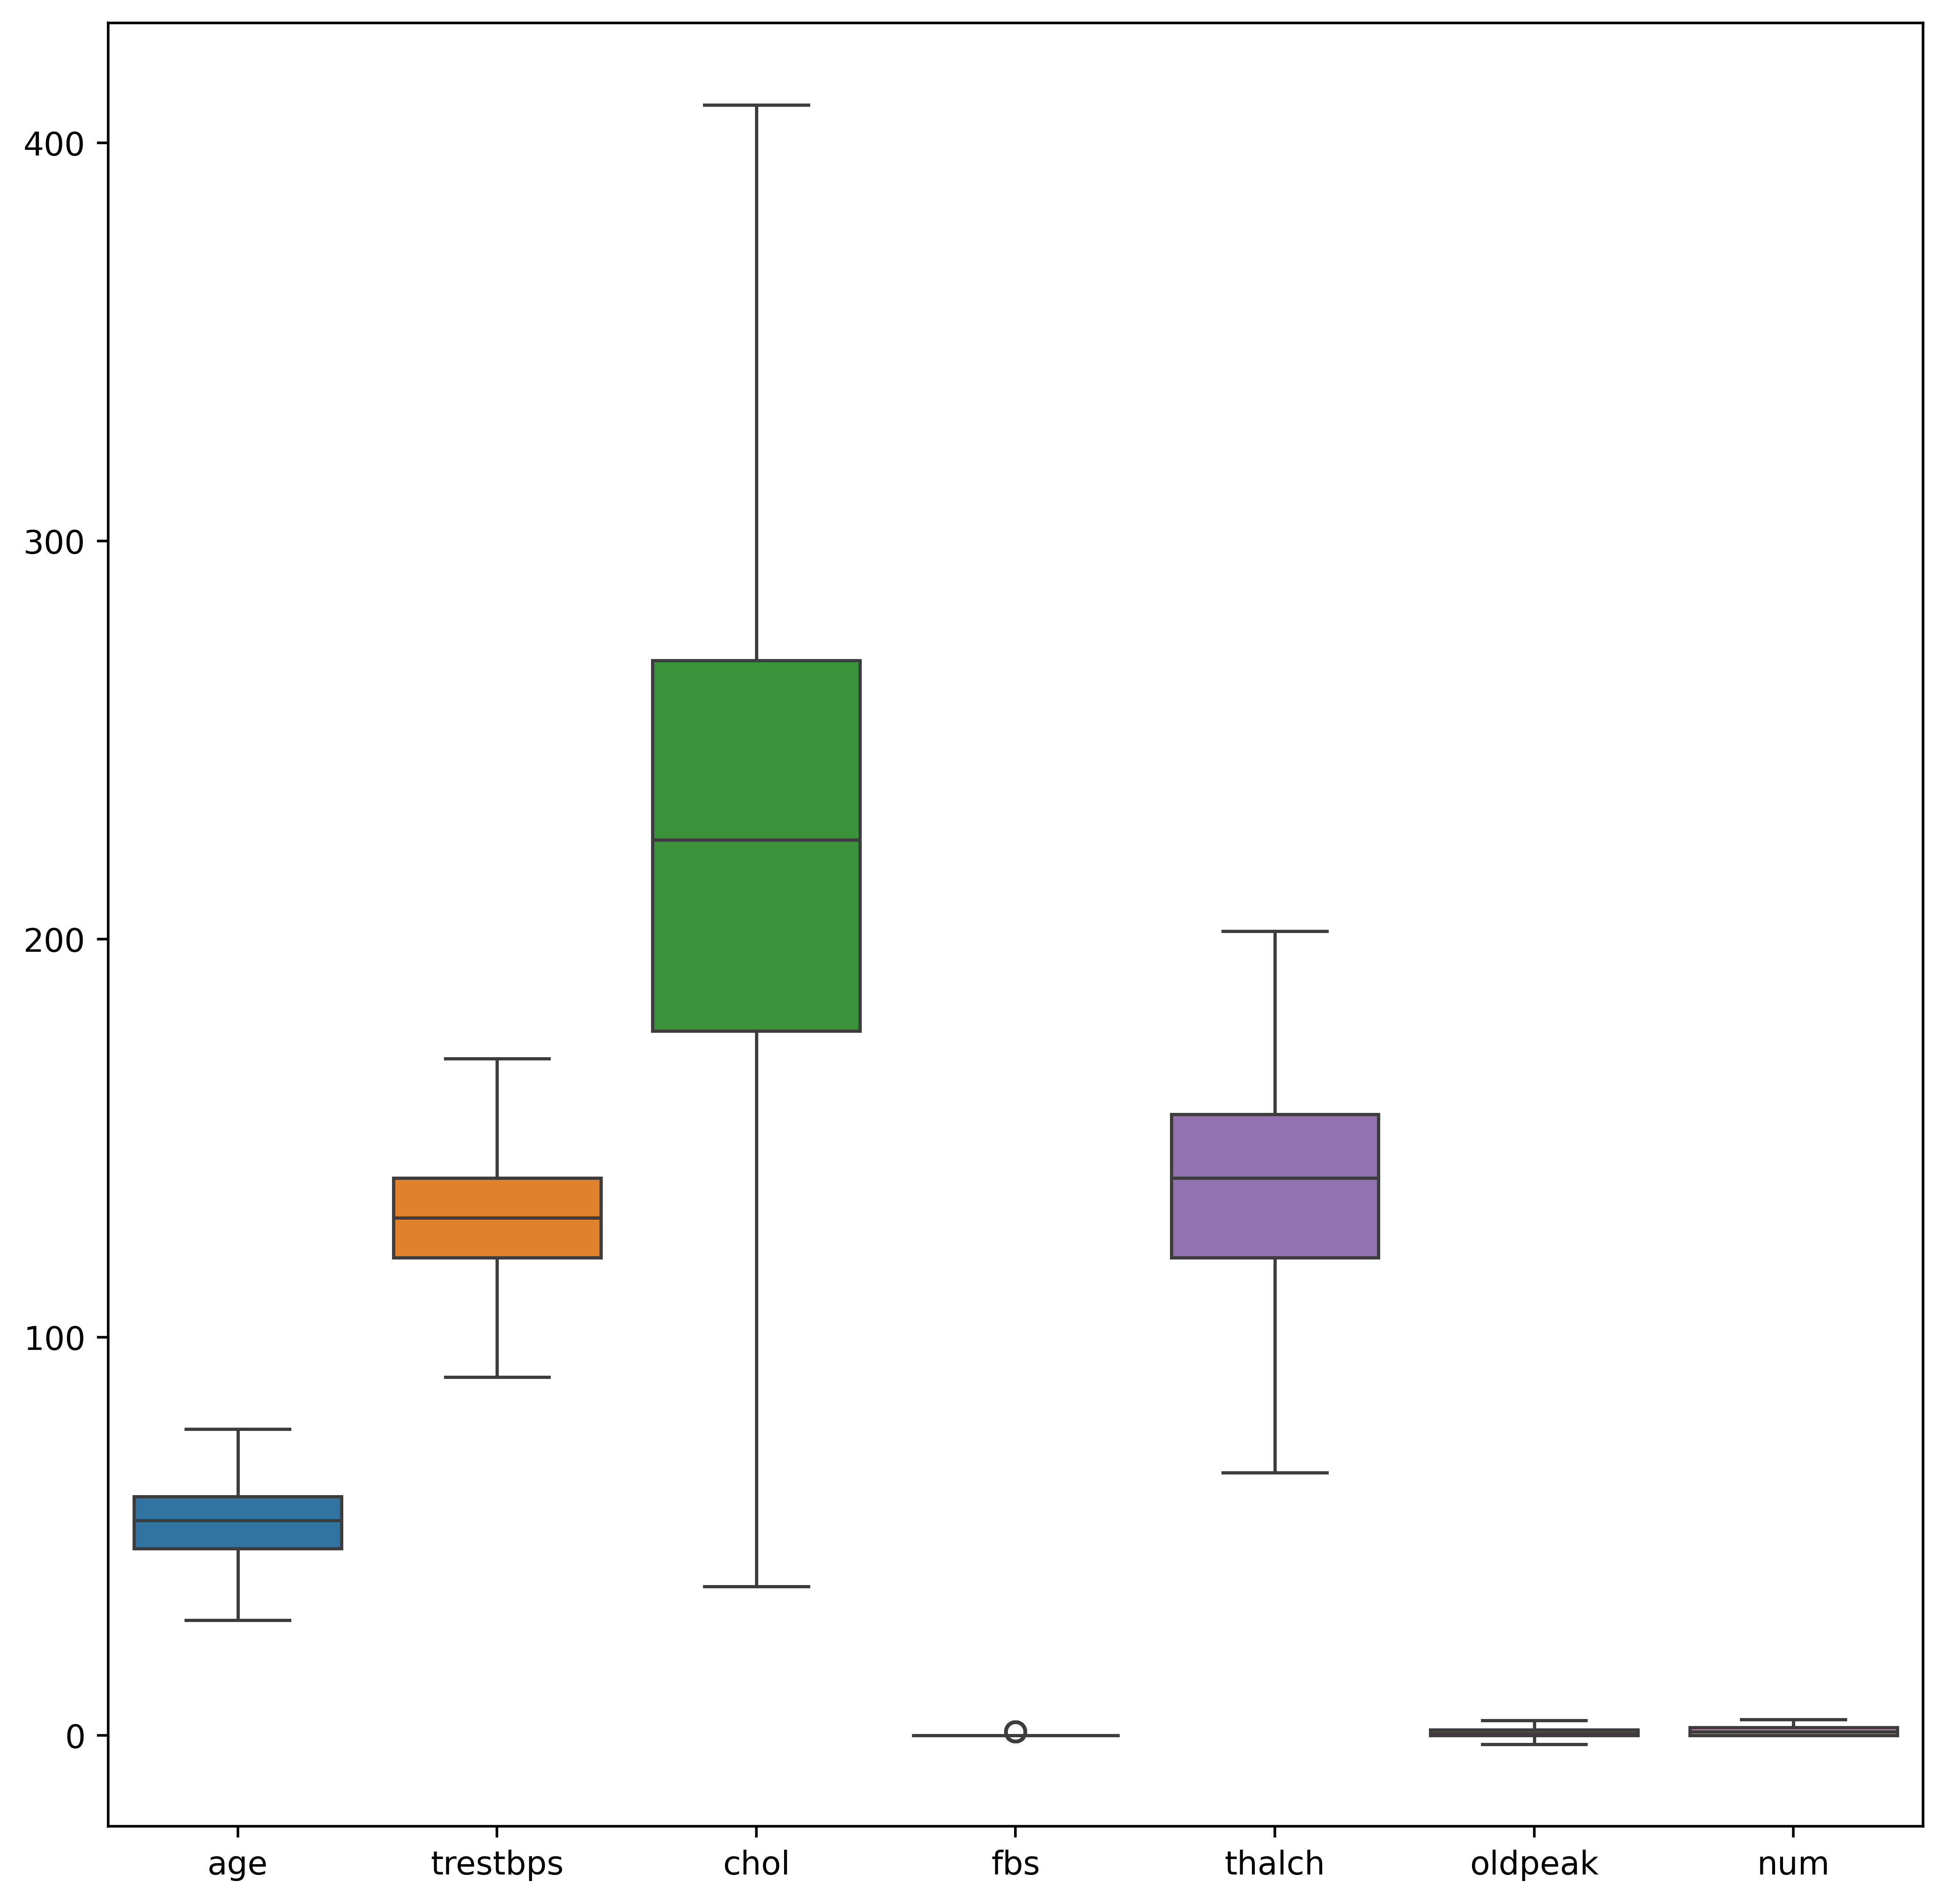

In [14]:
# Boxplot

sns.boxplot(df)

In [16]:
# Transforming Machine not understand text data they understand Only Number. So,convert all categorical to numerical 

In [17]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [18]:
# Outlier Detection
# converting categories into numbers using Label Encoding

from sklearn.preprocessing import LabelEncoder
import pandas as pd 
sf=pd.DataFrame(df)

label_encoder= LabelEncoder()

columns_to_encode=["sex","cp","fbs","restecg","exang","slope","thal"]
for col in columns_to_encode:
    sf[col]=label_encoder.fit_transform(sf[col])
print(sf)

      age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0    63.0    1   3     145.0  233.0    1        0   150.0      0      2.3   
1    41.0    1   1     135.0  203.0    0        1   132.0      0      0.0   
2    57.0    1   0     140.0  192.0    0        1   148.0      0      0.4   
3    52.0    1   3     118.0  186.0    0        0   190.0      0      0.0   
4    57.0    1   0     110.0  201.0    0        1   126.0      1      1.5   
..    ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
901  51.0    1   0     110.0   37.5    1        1    92.0      0      0.0   
902  62.0    1   0     160.0  254.0    1        2   108.0      1      3.0   
903  53.0    1   0     125.0   37.5    0        1   120.0      0      1.5   
904  62.0    1   0     166.0  170.0    0        2   120.0      1      3.0   
905  56.0    1   2     170.0   37.5    0        0   123.0      1      2.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2  

In [19]:
sf.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.036024,-0.091885,0.258537,-0.100165,0.177026,-0.037690,-0.346069,0.192967,0.246413,-0.051361,0.080826,0.331071
sex,0.036024,1.000000,-0.140694,0.008412,-0.204829,0.075313,0.055863,-0.175822,0.181764,0.109207,-0.047406,0.048606,0.259206
cp,-0.091885,-0.140694,1.000000,-0.009583,0.061494,-0.033356,-0.105577,0.292508,-0.375858,-0.177419,0.096976,-0.063565,-0.332296
trestbps,0.258537,0.008412,-0.009583,1.000000,0.110368,0.098889,0.024235,-0.106424,0.153667,0.177834,0.013599,0.093246,0.133554
chol,-0.100165,-0.204829,0.061494,0.110368,1.000000,-0.122336,-0.206194,0.222058,-0.030485,0.032088,0.051265,-0.018991,-0.246775
fbs,0.177026,0.075313,-0.033356,0.098889,-0.122336,1.000000,0.027196,-0.062058,0.011944,0.028041,-0.042744,-0.032357,0.138187
restecg,-0.037690,0.055863,-0.105577,0.024235,-0.206194,0.027196,1.000000,-0.181753,0.061681,-0.031286,-0.101629,-0.121592,0.003822
thalch,-0.346069,-0.175822,0.292508,-0.106424,0.222058,-0.062058,-0.181753,1.000000,-0.349763,-0.143900,0.250268,-0.059690,-0.349735
exang,0.192967,0.181764,-0.375858,0.153667,-0.030485,0.011944,0.061681,-0.349763,1.000000,0.396442,-0.161647,0.075681,0.384592
oldpeak,0.246413,0.109207,-0.177419,0.177834,0.032088,0.028041,-0.031286,-0.143900,0.396442,1.000000,-0.188358,0.043636,0.438931


## Model Building

In [20]:
x=sf.drop(columns = ['num'])
y=sf['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 845, dtype: int64

In [21]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)


In [22]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
136,51.0,1,3,125.0,213.0,0,0,125.0,1,1.4,2,1
850,53.0,1,0,144.0,300.0,1,2,128.0,1,1.5,1,2
857,58.0,1,0,160.0,256.0,1,0,113.0,1,1.0,2,1
135,74.0,0,1,120.0,269.0,0,0,121.0,1,0.2,2,1
514,60.0,1,0,130.0,37.5,1,2,130.0,1,1.1,0,0


In [23]:
ytrain

136    0
850    3
857    3
135    0
514    1
      ..
751    2
813    3
73     0
236    0
38     0
Name: num, Length: 676, dtype: int64

In [24]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 0, 0, 2, 0, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 2, 3, 0, 0,
       2, 0, 3, 0, 2, 0, 1, 1, 3, 0, 1, 1, 0, 1, 1, 0, 1, 3, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 4, 1, 0,
       2, 0, 1, 2, 1, 1, 2, 3, 1, 3, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 1, 3, 0, 4, 0, 0, 2, 3, 4, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 2, 0, 0, 0, 3, 0, 2, 1,
       0, 1, 0, 0, 3, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1], dtype=int64)

In [25]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [26]:
dt.feature_importances_  

array([0.14494527, 0.02710321, 0.10844829, 0.10887739, 0.14716581,
       0.02006061, 0.03293291, 0.15555902, 0.03357723, 0.13535253,
       0.0482556 , 0.03772213])

# Model Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        70
           1       0.39      0.39      0.39        44
           2       0.29      0.29      0.29        24
           3       0.33      0.30      0.32        23
           4       0.00      0.00      0.00         8

    accuracy                           0.50       169
   macro avg       0.34      0.35      0.35       169
weighted avg       0.48      0.50      0.49       169



In [29]:
confusion_matrix(ytest,ypred)

array([[54, 13,  2,  1,  0],
       [ 9, 17, 10,  7,  1],
       [ 3,  8,  7,  4,  2],
       [ 9,  5,  2,  7,  0],
       [ 2,  1,  3,  2,  0]], dtype=int64)

In [30]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.5029585798816568

In [31]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.5


In [32]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [33]:
sf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,41.0,1,1,135.0,203.0,0,1,132.0,0,0.0,1,0,0
2,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,0
3,52.0,1,3,118.0,186.0,0,0,190.0,0,0.0,1,0,0
4,57.0,1,0,110.0,201.0,0,1,126.0,1,1.5,1,0,0


In [34]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

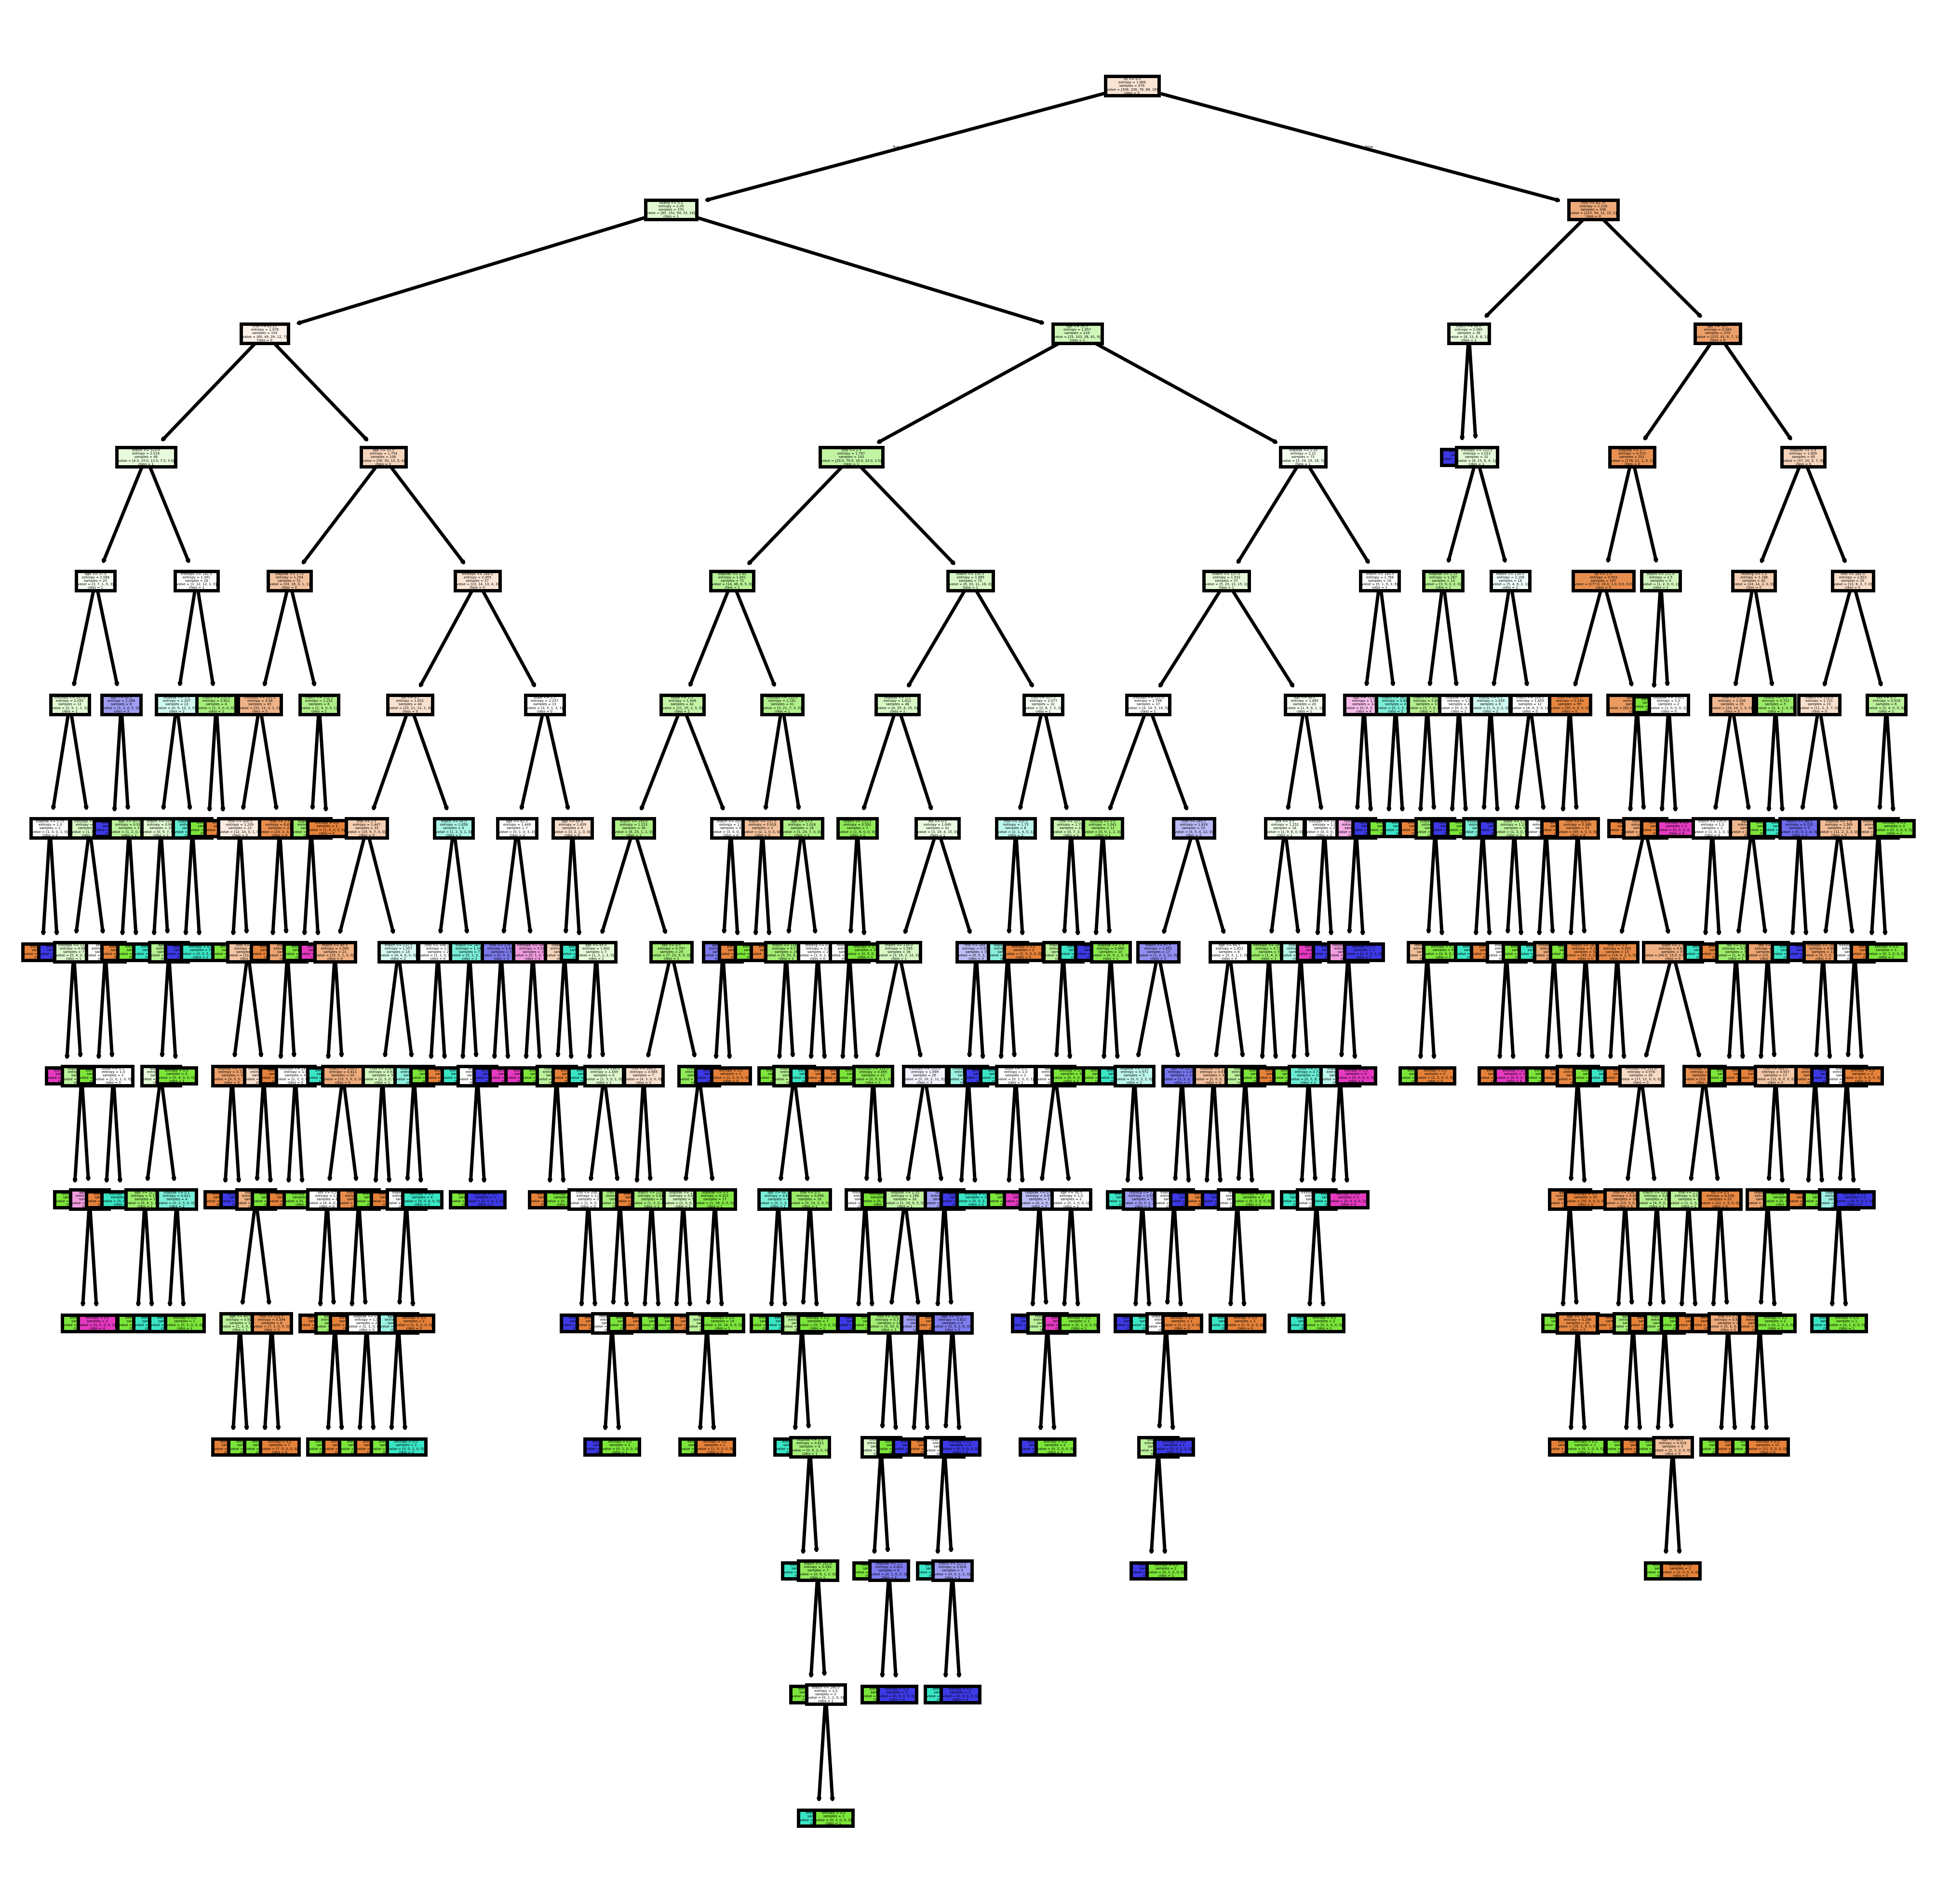

In [35]:
tree.plot_tree(dt,feature_names=x.columns,class_names=[str(i) for i in y.unique()], filled=True)
plt.show()

# Hyperparameter tuning


In [36]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth'  : [2,4,6,8],
    'splitter'  : ['best','random']
}

In [39]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [40]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [41]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}

In [43]:
dtr = DecisionTreeRegressor(criterion='absolute_error',
                           max_depth=8,splitter='random')


In [44]:
dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)

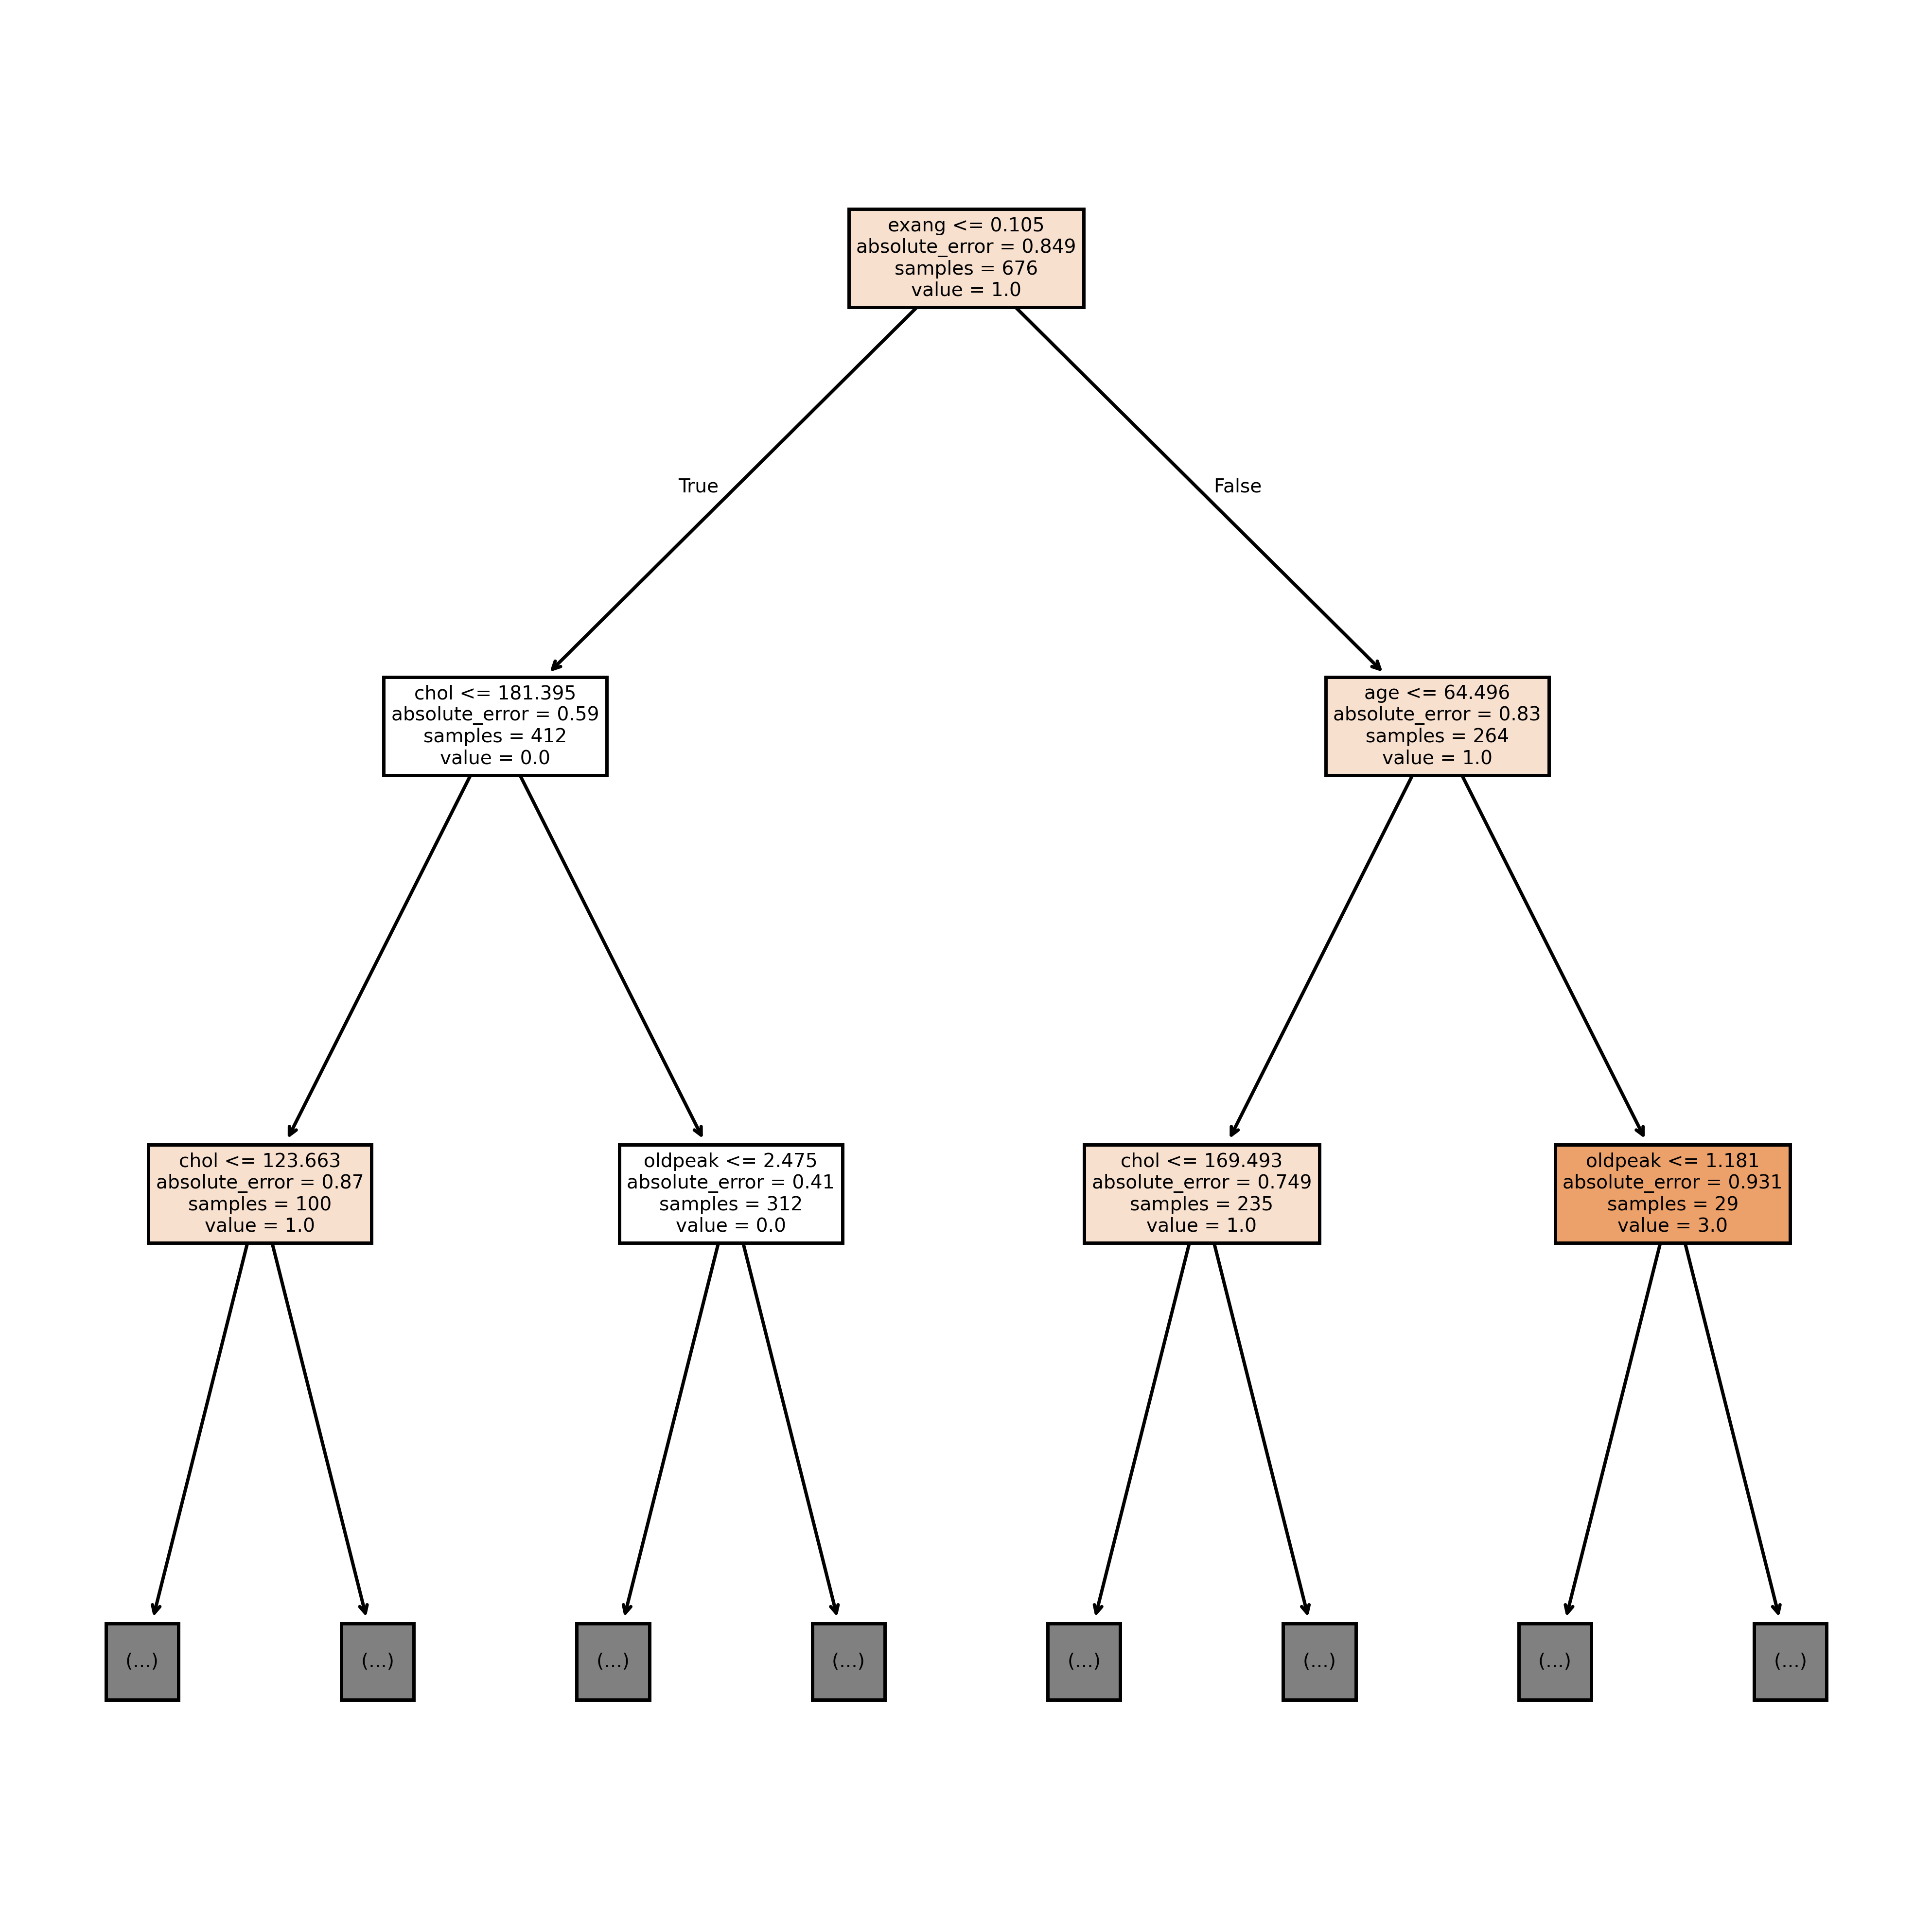

In [45]:
tree.plot_tree(dtr, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],filled=True, max_depth =2 )
plt.show()

# Interview Question

* What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
  
  ->  Decision tree models have key hyperparameters like max_depth (controls tree depth to prevent overfitting),   min_samples_split and min_samples_leaf (set minimum samples for splits and leaf nodes to ensure stability), and max_features (limits features for splits to reduce overfitting). Tuning these balances model complexity, accuracy, and generalization.


*  What is the difference between the Label encoding and One-hot encoding?

  -> Label Encoding assigns each unique category a numeric value, making it simple but potentially introducing an ordinal relationship that doesn't exist. One-Hot Encoding creates binary columns for each category, avoiding ordinal issues but increasing dimensionality, especially with many categories.